In [13]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

   Actual   Predict
0     5.2  5.151431
1     5.6  4.622023
2     5.3  4.981269
3     3.7  5.072481
4     4.8  5.071961
5     4.4  4.710755
6     5.1  3.946591
7     5.1  4.711410
8     4.6  5.379140
MSE : 0.5781152720365408
MAE : 0.6246237320672821
R2 : -1.0011682493572578


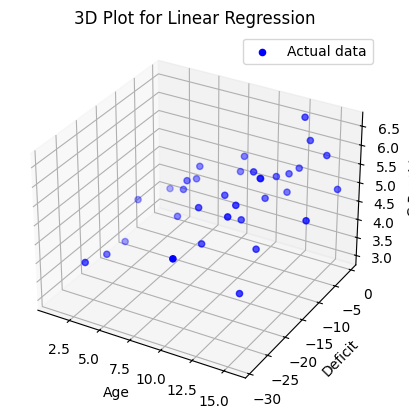

In [11]:
def solve_linear(i):
    i_str = str(i)
    column = ['Age' , 'Deficit' , 'C_peptide']
    df = pd.read_csv('diabetes-5-fold/diabetes-5-1tra.dat', delimiter=',' , skiprows=7 , names=column)
    train_x = df.drop("C_peptide" , axis = 1)
    train_y = df.C_peptide
    lr = LinearRegression()
    lr.fit(train_x , train_y)

    test = pd.read_csv('diabetes-5-fold/diabetes-5-1tst.dat', delimiter=',' , skiprows=7 , names=column)
    test_x = test.drop("C_peptide" , axis = 1)
    test_y = test.C_peptide
    y_pred = lr.predict(test_x)

    result = pd.DataFrame({'Actual': test_y , 'Predict' : y_pred})
    print(result)

    mse = mean_squared_error(test_y,y_pred)
    mae = mean_absolute_error(test_y, y_pred)
    r2 = r2_score(test_y,y_pred)

    print(f"MSE : {mse}")
    print(f"MAE : {mae}")
    print(f"R2 : {r2}")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(train_x["Age"], train_x["Deficit"], train_y, marker='o', label='Actual data', color='blue')
    # ax.plot_surface(age_mesh, deficit_mesh, c_peptide_pred, alpha=0.5, cmap='viridis', label='Regression plane')

    ax.set_xlabel('Age')
    ax.set_ylabel('Deficit')
    ax.set_zlabel('C Peptide')

    plt.title('3D Plot for Linear Regression')
    plt.legend()
    plt.show()

solve_linear(1)

In [21]:
def solve_ridge(i):
    i_str = str(i)
    column = ['Age' , 'Deficit' , 'C_peptide']
    df = pd.read_csv(f'diabetes-5-fold/diabetes-5-{i_str}tra.dat', delimiter=',' , skiprows=7 , names=column)
    train_x = df.drop("C_peptide" , axis = 1)
    train_y = df.C_peptide

    test = pd.read_csv(f'diabetes-5-fold/diabetes-5-{i_str}tst.dat', delimiter=',' , skiprows=7 , names=column)
    test_x = test.drop("C_peptide" , axis = 1)
    test_y = test.C_peptide

    ridge_model = Ridge()
    param_grid = {'alpha' : np.logspace(2 , 16  , 250)}

    grid_search = GridSearchCV(ridge_model , param_grid , cv=5 , scoring="neg_mean_squared_error")
    grid_search.fit(train_x , train_y)

    best_ridge_model = grid_search.best_estimator_

    y_pred_ridge = best_ridge_model.predict(train_x)


    mse = mean_squared_error(test_y, y_pred_ridge)
    mae = mean_absolute_error(test_y  , y_pred_ridge)
    r2 = r2_score(test_y , y_pred_ridge)

    print(f"MSE : {mse}")
    print(f"MAE : {mae}")
    print(f"R2 : {r2}")
    print(f"Best alpha for Grid Search : {grid_search.best_params_["alpha"]}")


    fig = plt.figure()
    ax = fig.add_subplot(111 , projection="3d")

    ax.scatter(test_x['Age'], test_x['Deficit'], test_y, c='black', marker='o', Label = "Actual") 
    ax.scatter(test_x['Age'], test_x['Deficit'], y_pred_ridge, c = "red", marker='x', label="Predicted (Ridge)") 
    x_min, x_max =  test_x['Age'].min(), test_x['Age'].max() 
    y_min, y_max=test_x['Deficit'].min(), test_x['Deficit'].max() 
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 18)) 
    zz_ridge = best_ridge_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
    ax.plot_surface(xx, yy, zz_ridge, alpha=0.5, color='blue', label='Regression Plane (Ridge)')

    ax.set_xlabel('Age') 
    ax.set_ylabel('Deficit') 
    ax.set_zlabel('C_peptide') 
    ax.set_title('Ridge Regression 3D Scatter Plot with Plane') 
    
    ax.legend() 
    plt.show()
    
solve_ridge(1)

ValueError: Found input variables with inconsistent numbers of samples: [9, 34]

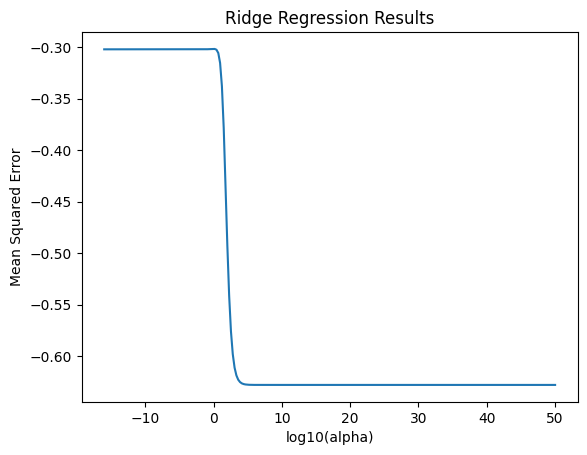

MSE : 0.5690949478554852
MAE : 0.6207832693536963
R2 : -0.9699440502689882
Best alpha for Grid Search : 0.8009666945806034


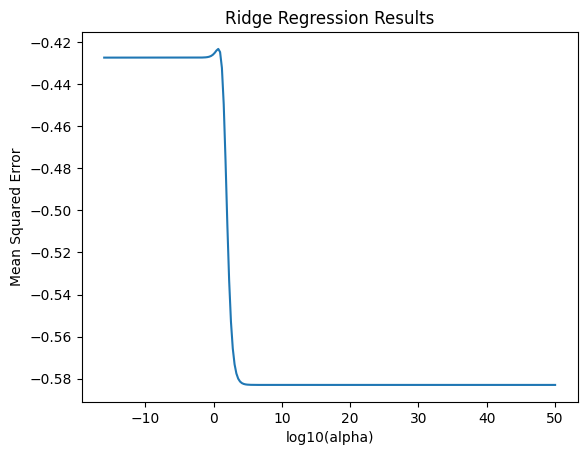

MSE : 0.24150081536690882
MAE : 0.4136484829111626
R2 : 0.012042118953555114
Best alpha for Grid Search : 4.9979876738269144


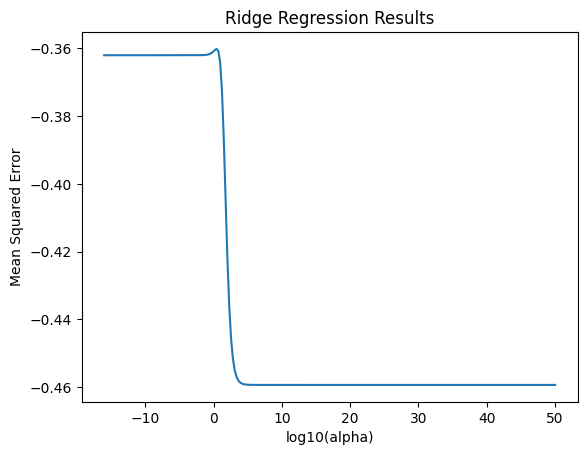

MSE : 0.40451286663969105
MAE : 0.4656565409642581
R2 : 0.40534406174564475
Best alpha for Grid Search : 2.7147818672390773


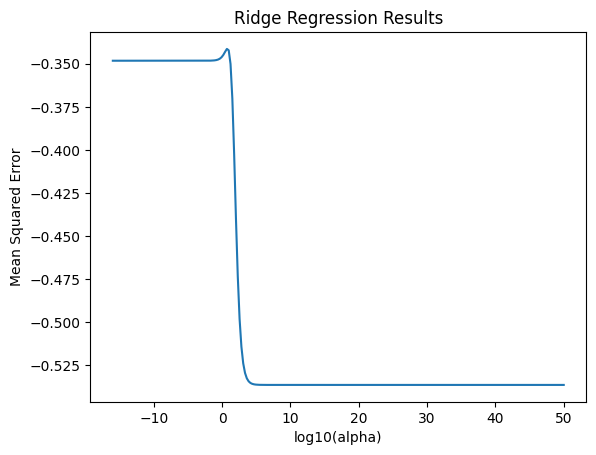

MSE : 0.4351850808898524
MAE : 0.5426469623847832
R2 : -0.01946724659409038
Best alpha for Grid Search : 4.9979876738269144


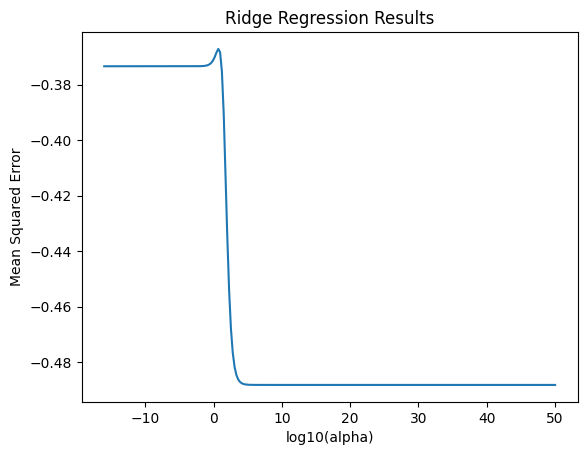

MSE : 0.36626641841972285
MAE : 0.4210637178402076
R2 : 0.46917910373953187
Best alpha for Grid Search : 4.9979876738269144


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


for i in range (1 , 6):
    i_str = str(i)
    column = ['Age' , 'Deficit' , 'C_peptide']
    df = pd.read_csv(f'diabetes-5-fold/diabetes-5-{i_str}tra.dat', delimiter=',' , skiprows=7 , names=column)
    X_train = df.drop("C_peptide" , axis = 1)
    y_train = df.C_peptide

    test = pd.read_csv(f'diabetes-5-fold/diabetes-5-{i_str}tst.dat', delimiter=',' , skiprows=7 , names=column)
    X_test= test.drop("C_peptide" , axis = 1)
    y_test = test.C_peptide

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge = Ridge()

    param_grid = {'alpha': np.logspace(-16, 50, 250)}

    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    best_alpha = grid_search.best_params_['alpha']

    final_ridge_model = Ridge(alpha=best_alpha)
    final_ridge_model.fit(X_train_scaled, y_train)

    test_predictions = final_ridge_model.predict(X_test_scaled)

    plt.plot(np.log10(param_grid['alpha']), grid_search.cv_results_['mean_test_score'])
    plt.xlabel('log10(alpha)')
    plt.ylabel('Mean Squared Error')
    plt.title('Ridge Regression Results')
    plt.show()

    mse = mean_squared_error(y_test, test_predictions)
    mae = mean_absolute_error(y_test  , test_predictions)
    r2 = r2_score(y_test , test_predictions)

    print(f"MSE : {mse}")
    print(f"MAE : {mae}")
    print(f"R2 : {r2}")
    print(f"Best alpha for Grid Search : {grid_search.best_params_["alpha"]}")
